## BMI 6106 - Final Project

#### Project by: <br>
Jorge Rojas <br>
Gabby Iorg <br>
Anwar Alsanea <br>

# Statistical analysis on NEMSIS 

### Abstract <br>


### Introduction <br>


### Methods 

### Results and Discussion

## The goal of this study is to analyze a subset of characteristics from 911 call events.

### Packages and libraries installation: 

In [7]:
install.packages(c("FactoMineR", "factoextra"))
install.packages("corrplot")
install.packages("PCAmixdata")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library("FactoMineR")
library("corrplot")
library("factoextra")
library(modelr)
library(broom)
library("PCAmixdata")

require(stats)
#require(pls)

### DATA SETUP: Input and output data

In [9]:
events = read.table(file = "events_cleaned_v3.txt", sep="|", header = TRUE, stringsAsFactors = F)
head(events, n=7)
#dim(events)

Version,primary.key,type.of.service.requested,primary.role.of.the.unit,response.mode.to.scene,complaint.reported.by.dispatch,emd.performed,psap.call.datetime,unit.notified.by.dispatch.datetime,unit.en.route.datetime,⋯,cardiac.arrest,cardiac.arrest.etiology,incident.patient.disposition,transport.mode.from.scene,reason.for.choosing.destination,type.of.destination,emergency.department.disposition,hospital.disposition,age.in.years,day.of.year
V2,230850208,40,75,390,560,-25,2016-01-01 02:15:00,2016-01-01 02:16:00,2016-01-01 02:17:00,⋯,0,-25,4850,4970,4990,7280,-20,-20,80,1
V2,230850209,30,60,390,440,-10,2016-01-01 01:49:00,2016-01-01 01:50:00,2016-01-01 01:50:00,⋯,0,-25,4845,4965,4990,7280,-10,-10,76,1
V2,230850210,30,75,390,-25,-25,2016-01-01 01:26:00,2016-01-01 01:26:00,2016-01-01 01:27:00,⋯,0,-25,4850,4965,4990,7280,-25,-25,67,1
V2,230850211,30,60,390,480,-25,2016-01-01 01:06:00,2016-01-01 01:06:00,2016-01-01 01:08:00,⋯,-25,-25,4850,4970,5000,7280,5335,-25,88,1
V2,230850212,30,75,390,445,-10,2016-01-01 01:00:00,2016-01-01 01:01:00,2016-01-01 01:03:00,⋯,0,-25,4850,4970,5025,7280,-10,-10,76,1
V2,230850213,30,60,390,-5,-10,2016-01-01 00:58:00,2016-01-01 00:58:00,2016-01-01 00:59:00,⋯,0,-25,4845,-25,5000,7280,-25,-25,85,1
V2,230850214,30,60,390,540,-10,2016-01-01 00:58:00,2016-01-01 00:58:00,2016-01-01 01:01:00,⋯,0,-25,4845,4965,5025,7280,-10,-10,51,1


### Create vectors, handle variables, and perform other basic functions (remove NAs)

In [10]:
event1 = select(events,  age.in.years,  gender, primary.method.of.payment, 
                incident.location.type, primary.symptom, 
                cause.of.injury, incident.patient.disposition, complaint.reported.by.dispatch
                )


event1[event1 < 0] <- NA
#head(event1, n=50)
event2 = na.exclude(event1)
dim(event2)
head(event2)


[1] 292   8

,age.in.years,gender,primary.method.of.payment,incident.location.type,primary.symptom,cause.of.injury,incident.patient.disposition,complaint.reported.by.dispatch
43,19,650,720,1175,1415,9600,4850,560
46,75,650,720,1175,1495,9550,4850,560
50,79,655,730,1135,1405,9550,4850,545
63,54,655,745,1135,1405,9640,4840,415
67,45,655,735,1135,1475,9550,4850,525
79,50,650,735,1135,1475,9550,4850,525


### Tackle data structures manipulation such as matrices, lists, factors, and data frames.


In [11]:
str(event2)

'data.frame':	292 obs. of  8 variables:
 $ age.in.years                  : int  19 75 79 54 45 50 28 62 22 83 ...
 $ gender                        : num  650 650 655 655 655 650 655 655 655 655 ...
 $ primary.method.of.payment     : num  720 720 730 745 735 735 725 725 725 730 ...
 $ incident.location.type        : num  1175 1175 1135 1135 1135 ...
 $ primary.symptom               : num  1415 1495 1405 1405 1475 ...
 $ cause.of.injury               : num  9600 9550 9550 9640 9550 ...
 $ incident.patient.disposition  : int  4850 4850 4850 4840 4850 4850 4850 4850 4850 4850 ...
 $ complaint.reported.by.dispatch: num  560 560 545 415 525 525 540 480 480 480 ...
 - attr(*, "na.action")=Class 'exclude'  Named int [1:9708] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..- attr(*, "names")= chr [1:9708] "1" "2" "3" "4" ...


In [12]:
#Converting gender as factor:
event2$gender <-as.factor(event2$gender)
levels(event2$gender) <- c("male", "female")

#Converting dataframe as factor:
event2 <- data.frame(lapply(event2, as.factor))

#Converting age.in.years as numeric:
event2$age.in.years <-as.numeric(event2$age.in.years)
#event2$day.of.year <-as.numeric(event2$day.of.year)

#Checking summaries
summary(event2)
contrasts(event2$gender)

head(event2)


  age.in.years      gender    primary.method.of.payment incident.location.type
 Min.   : 1.00   male  :134   720:112                   1160   :139           
 1st Qu.:23.00   female:158   725: 52                   1135   :106           
 Median :45.00                730: 67                   1175   : 22           
 Mean   :43.96                735: 18                   1180   : 10           
 3rd Qu.:62.25                745: 39                   1170   :  7           
 Max.   :85.00                750:  4                   1150   :  4           
                                                        (Other):  4           
 primary.symptom cause.of.injury incident.patient.disposition
 1475   :177     9550   :144     4835: 14                    
 1405   : 39     9595   : 85     4840:  2                    
 1500   : 19     9640   : 18     4845:  2                    
 1415   : 17     9590   :  7     4850:274                    
 1505   : 12     9635   :  7                              

,female
male,0
female,1


age.in.years,gender,primary.method.of.payment,incident.location.type,primary.symptom,cause.of.injury,incident.patient.disposition,complaint.reported.by.dispatch
12,male,720,1175,1415,9600,4850,560
65,male,720,1175,1495,9550,4850,560
69,female,730,1135,1405,9550,4850,545
45,female,745,1135,1405,9640,4840,415
36,female,735,1135,1475,9550,4850,525
41,male,735,1135,1475,9550,4850,525


In [15]:
str(event2)

'data.frame':	292 obs. of  8 variables:
 $ age.in.years                  : num  12 65 69 45 36 41 21 53 15 73 ...
 $ gender                        : Factor w/ 2 levels "male","female": 1 1 2 2 2 1 2 2 2 2 ...
 $ primary.method.of.payment     : Factor w/ 6 levels "720","725","730",..: 1 1 3 5 4 4 2 2 2 3 ...
 $ incident.location.type        : Factor w/ 8 levels "1135","1150",..: 6 6 1 1 1 1 3 1 1 7 ...
 $ primary.symptom               : Factor w/ 13 levels "1405","1410",..: 3 11 1 1 9 9 1 9 9 12 ...
 $ cause.of.injury               : Factor w/ 20 levels "1885","9500",..: 12 6 6 19 6 6 11 6 6 6 ...
 $ incident.patient.disposition  : Factor w/ 4 levels "4835","4840",..: 4 4 4 2 4 4 4 4 4 4 ...
 $ complaint.reported.by.dispatch: Factor w/ 19 levels "400","410","415",..: 19 19 16 3 13 13 15 8 8 8 ...


### Build statistical models with linear regressions and analysis of variance

#### Regressions: 2 models

In [13]:
model = glm(gender ~. -gender, data= event2, family= binomial)
summary(model)

#Gender (outcome variable, Y) and the rest of the variables (predictors, X) 
#Null hypothesis (H0): the coefficients are equal to zero (i.e., no relationship between x and y)
#Alternative Hypothesis (Ha): the coefficients are not equal to zero (i.e., there is some relationship between x and y)

#There is not enough evidence to say that there is a relationship between gender and the predictors. 
#the p-values for the intercept and the predictor variable are not significant, We can NOT reject the null hypothesis.

#which means that there is a significant association between the predictor and the outcome variables.
#The value of the beta coefficients also support a significant association between the gender (predictor, X) and the age (outcome variable, Y)
#However this association is not significant for categories 7, 8 and 9. 


  ###Interpretation:
JUST FOR FUN, IF THERE WAS A SIGNIFICANT P VALUE:
#From the P value numbers we can say that only primary.method.of.payment745 (Self Pay) and
#primary.symptom(1500 and 1505) are significantly associated with the caller’s gender.
#All of the other variables do not seem to show any relationship to the caller’s gender.
#The coefficient estimate of the variable primary.method.of.payment745 is b = -1.779e+00, which is negative. 
#This means that a if the caller (or patient) is Self Pay, then 
#it is associated with a decreased probability of being a female. 

#primary.symptom1500 (Weakness) b = 1.411e+00 which is positive.
#primary.symptom1505 (Wound) b = 1.543e+00 which is positive.
#This means that symptoms of weakness and wounds are
#associated with a increased probability of being a female.


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = gender ~ . - gender, family = binomial, data = event2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9876  -0.8588   0.1365   0.8498   1.8866  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)                       -5.177e-01  1.076e+04   0.000  0.99996   
age.in.years                       6.045e-03  9.524e-03   0.635  0.52558   
primary.method.of.payment725       5.691e-01  4.560e-01   1.248  0.21208   
primary.method.of.payment730      -2.180e-01  4.707e-01  -0.463  0.64332   
primary.method.of.payment735      -2.942e+00  1.983e+00  -1.484  0.13789   
primary.method.of.payment745      -1.779e+00  5.930e-01  -3.001  0.00269 **
primary.method.of.payment750      -1.900e+01  3.765e+03  -0.005  0.99597   
incident.location.type1150        -4.598e-01  1.560e+00  -0.295  0.76823   
incident.location.type1160         1.695e-01  4.654e-01   0.364  0.71575   
incident.location.type1165         

In [14]:
model2 = lm(age.in.years ~. -age.in.years, data= event2)
summary(model2)

  ###Interpretation:
#Now for the callers age: From the P value numbers we can say that day.of.year(26,114,134,152), 
#primary.method.of.payment(725, 730, 745), cause.of.injury(9565,9605), primary.symptom1500, 
#and incident.patient.disposition4845 are significantly associated with the caller’s Age.

#The coefficient estimate of the variables are: 
#primary.method.of.payment725 (Medicaid) b = -8.18997, which is negative.
#primary.method.of.payment730(Medicare) b = 18.12710 which is positive.
#This means that as age increases the probability of being on Medicaid decreases; 
#but the probability of being on Medicare increases as age increases. 


#primary.symptom1500 (Weakness) b = 11.61739 which is positive.
#This means that as age increases the probability of the primary symptom being "Weakness" increases. 

#cause.of.injury9565 (Firearm injury) b = -54.3940, which is negative.
#cause.of.injury9505 (Bicycle Accident) b = -74.6450, which is negative.
##cause.of.injury9600 (Motorcycle Accident) b = -41.42219, which is negative.
#This means that accidents involving Firearms, Motorcycle, and Bicycles are more prevalent among younger people. 




Call:
lm(formula = age.in.years ~ . - age.in.years, data = event2)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.629  -8.559   0.000   9.666  47.026 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        57.41764   31.56974   1.819  0.07027 .  
genderfemale                        1.65394    2.21532   0.747  0.45609    
primary.method.of.payment725       -8.18997    3.09804  -2.644  0.00878 ** 
primary.method.of.payment730       18.12710    2.99035   6.062 5.59e-09 ***
primary.method.of.payment735       -6.15038    9.88407  -0.622  0.53440    
primary.method.of.payment745       -4.83397    3.66067  -1.321  0.18800    
primary.method.of.payment750        0.99914    9.56948   0.104  0.91694    
incident.location.type1150        -14.21506   10.67750  -1.331  0.18443    
incident.location.type1160         -0.03377    3.07069  -0.011  0.99124    
incident.location.type1165         -8.52096    9.40231  -0.906 

##### Regression assumptions:

Warning message:
“not plotting observations with leverage one:
  13, 39, 65, 67, 82, 84, 105, 153, 239, 243, 258, 290, 291”Warning message:
“not plotting observations with leverage one:
  13, 39, 65, 67, 82, 84, 105, 153, 239, 243, 258, 290, 291”

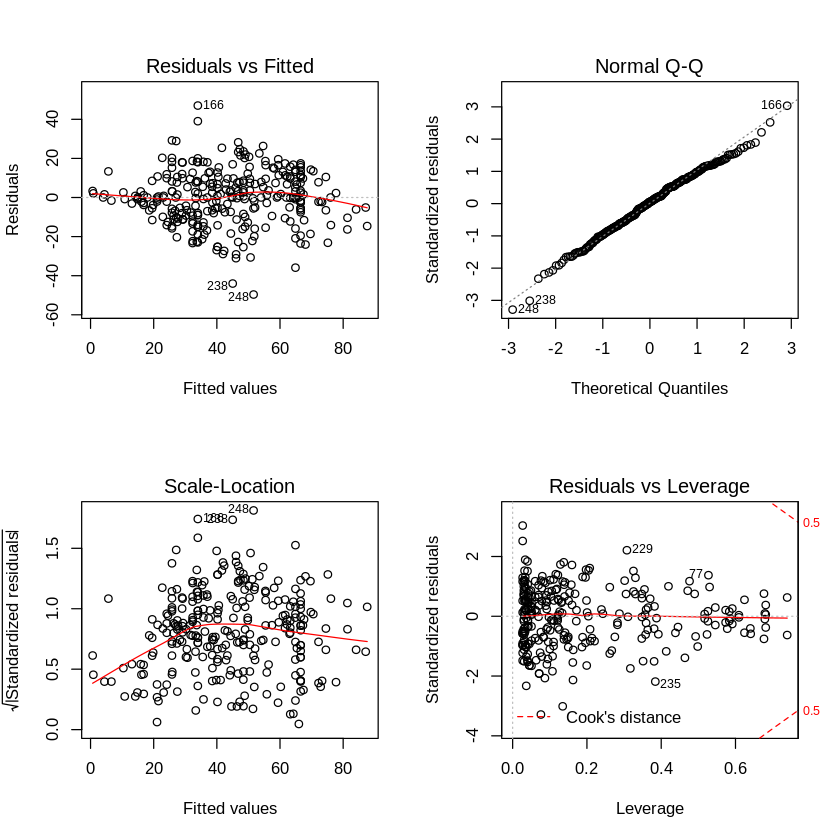

In [24]:
par(mfrow = c(2, 2))
plot(model2)

  #### Linearity of the data (Residuals vs Fitted). 
#There is no pattern in the residual plot. This suggests that we can assume linear relationship 
#between the predictors and the outcome variables.

 #### Normality of residuals (Normal Q-Q plot).
#All the points fall approximately along the reference line, so we can assume normality.


#Homogeneity of residuals variance (Scale-Location).  
#It can be seen that the variability (variances) of the residual points does not quite follows a horizontal 
#line with equally spread points, suggesting non-constant variances in the residuals errors 
#(or the presence of some heteroscedasticity).
#To reduce the heteroscedasticity problem we use the log transformation of the outcome variable (age.in.years, (y)).
#model3 = lm(log(age.in.years) ~. -age.in.years, data= event2)


#Independence of residuals error terms (Residuals vs Leverage).
#There are not drastic outliers in our data. 

Warning message:
“not plotting observations with leverage one:
  13, 39, 65, 67, 82, 84, 105, 153, 239, 243, 258, 290, 291”

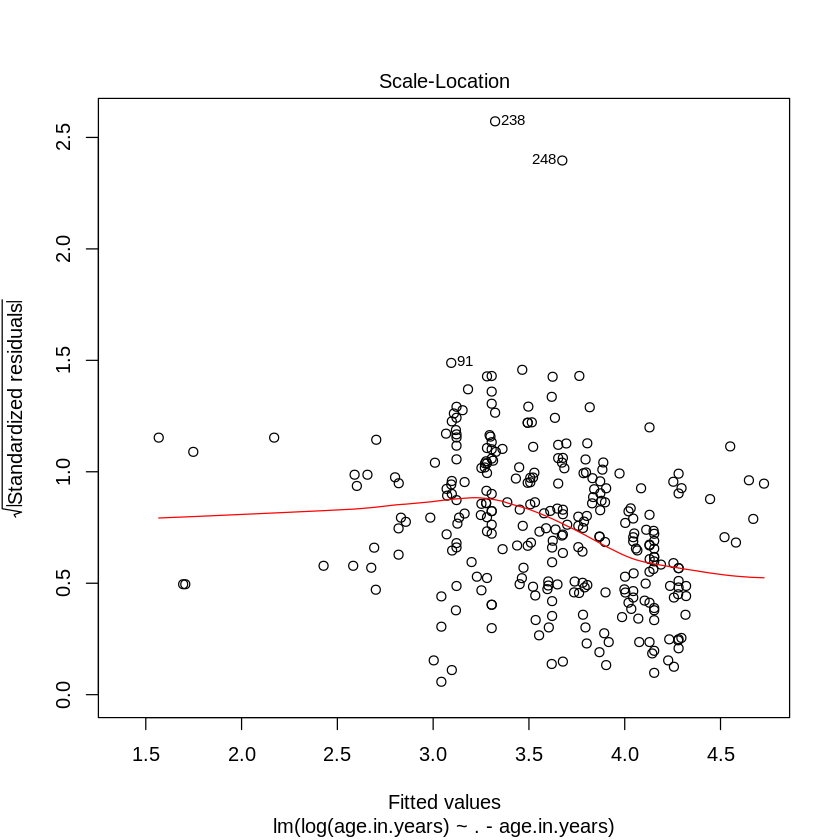

In [28]:
#Transformed Regression and new plot:
model3 = lm(log(age.in.years) ~. -age.in.years, data= event2)

plot(model3, 3)
#heteroscedasticity has been improved. 

In [29]:
summary(model3)
###Interpretation:
#Now for the callers age: From the P value numbers we can say that day.of.year(26,114,134,152), 
#primary.method.of.payment(725, 730, 745), cause.of.injury(9565,9605), primary.symptom1500, 
#and incident.patient.disposition4845 are significantly associated with the caller’s Age.

#The coefficient estimate of the variables are: 
#primary.method.of.payment725 (Medicaid) b = -8.18997, which is negative.
#primary.method.of.payment730(Medicare) b = 18.12710 which is positive.
#This means that as age increases the probability of being on Medicaid decreases; 
#but the probability of being on Medicare increases as age increases. 


#primary.symptom1500 (Weakness) b = 11.61739 which is positive.
#This means that as age increases the probability of the primary symptom being "Weakness" increases. 

#cause.of.injury9565 (Firearm injury) b = -54.3940, which is negative.
#cause.of.injury9505 (Bicycle Accident) b = -74.6450, which is negative.
##cause.of.injury9600 (Motorcycle Accident) b = -41.42219, which is negative.
#This means that accidents involving Firearms, Motorcycle, and Bicycles are more prevalent among younger people. 




Call:
lm(formula = log(age.in.years) ~ . - age.in.years, data = event2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3234 -0.2324  0.0299  0.2840  1.0889 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.583393   1.085173   4.224 3.49e-05 ***
genderfemale                       0.024433   0.076149   0.321   0.7486    
primary.method.of.payment725      -0.183656   0.106492  -1.725   0.0860 .  
primary.method.of.payment730       0.476600   0.102790   4.637 5.99e-06 ***
primary.method.of.payment735      -0.047058   0.339753  -0.139   0.8900    
primary.method.of.payment745      -0.029123   0.125831  -0.231   0.8172    
primary.method.of.payment750       0.319913   0.328940   0.973   0.3318    
incident.location.type1150        -0.173037   0.367026  -0.471   0.6378    
incident.location.type1160         0.127402   0.105551   1.207   0.2287    
incident.location.type1165        -0.131085   0.323193  -0

#### Component Analysis

In [21]:
res.famd <- FAMD(event2, ncp=4, graph = FALSE)
summary(res.famd)

#About 5% of the variation is explained by this first eigenvalue, which is the first dimension.


Call:
FAMD(base = event2, ncp = 4, graph = FALSE) 


Eigenvalues
                      Dim.1  Dim.2  Dim.3  Dim.4
Variance              3.270  2.503  2.322  2.226
% of var.             4.954  3.792  3.518  3.372
Cumulative % of var.  4.954  8.746 12.264 15.637

Individuals (the 10 first)
                                   Dist    Dim.1    ctr   cos2    Dim.2    ctr
1                              | 12.693 | -0.026  0.000  0.000 | -0.266  0.010
2                              | 10.976 | -2.149  0.484  0.038 | -0.875  0.105
3                              |  4.786 | -1.744  0.319  0.133 |  0.879  0.106
4                              | 13.821 |  1.933  0.391  0.020 |  4.027  2.219
5                              |  7.772 | -0.748  0.059  0.009 |  1.001  0.137
6                              |  7.787 | -0.546  0.031  0.005 |  1.113  0.170
7                              |  4.358 |  2.236  0.524  0.263 | -0.725  0.072
8                              |  3.315 | -1.242  0.162  0.140 |  0.035  0.000

In [115]:
#PCA_data = select(clean_data, -log_paamv)
res.pca =PCAmix(X.quanti=event2[,c(1)], X.quali=event2[,c(2:8)], ndim=4, graph=FALSE) #The scale.unit = TRUE is doing the standarization.
summary(res.pca)

#age.in.years ~. -age.in.years, data= event2


Call:
PCAmix(X.quanti = event2[, c(1)], X.quali = event2[, c(2:8)],     ndim = 4, graph = FALSE)

Method = Factor Analysis of mixed data (FAmix)

Data: 
   number of observations:  292
   number of  variables:  8
        number of numerical variables:  1
        number of categorical variables:  7

Squared loadings :
                               dim 1 dim 2 dim 3 dim 4
X.quanti                        0.56  0.03  0.00  0.00
gender                          0.07  0.01  0.10  0.01
primary.method.of.payment       0.45  0.08  0.55  0.08
incident.location.type          0.42  0.28  0.25  0.05
primary.symptom                 0.14  0.42  0.18  0.64
cause.of.injury                 0.81  0.83  0.26  0.78
incident.patient.disposition    0.02  0.03  0.48  0.01
complaint.reported.by.dispatch  0.79  0.82  0.50  0.65




In [116]:
res.mca <- MCA(event2[,2:8], ncp = 4, graph = FALSE)
summary(res.mca)


Call:
MCA(X = event2[, 2:8], ncp = 4, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.407   0.351   0.331   0.318   0.305   0.293   0.285
% of var.              4.385   3.785   3.566   3.420   3.285   3.155   3.066
Cumulative % of var.   4.385   8.171  11.736  15.156  18.441  21.596  24.663
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.282   0.261   0.242   0.239   0.228   0.224   0.220
% of var.              3.039   2.815   2.611   2.576   2.452   2.411   2.374
Cumulative % of var.  27.702  30.517  33.128  35.705  38.156  40.567  42.941
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.218   0.210   0.196   0.193   0.186   0.177   0.170
% of var.              2.352   2.258   2.108   2.077   2.001   1.910   1.830
Cumulative % of var.  45.293  47.551  49.658  51.735  53.736  55.646  57.476
       

### Create a variety of graphic displays

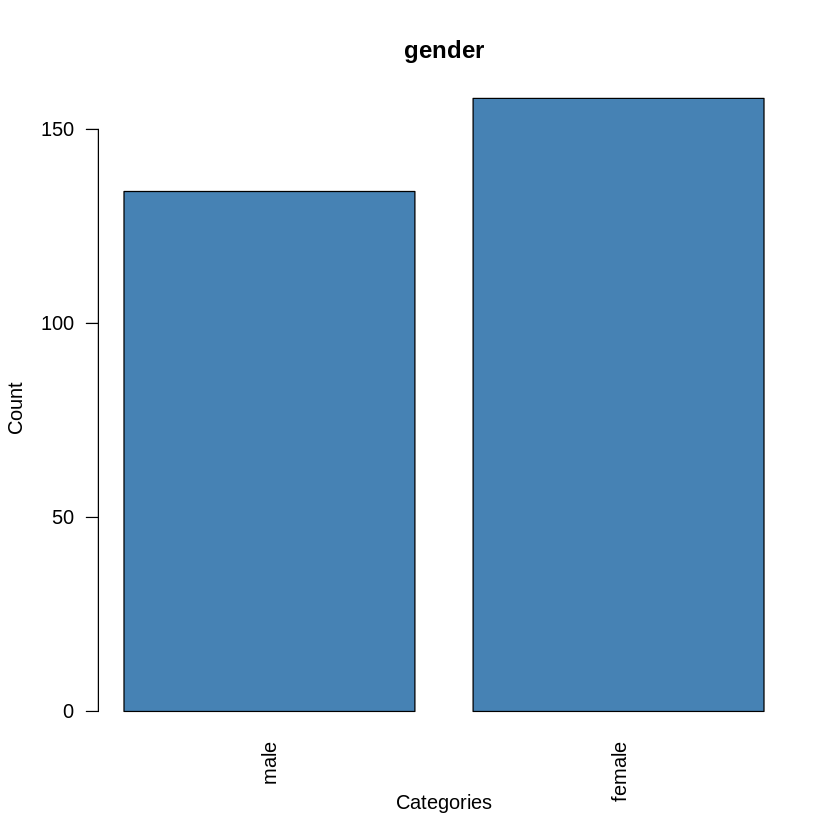

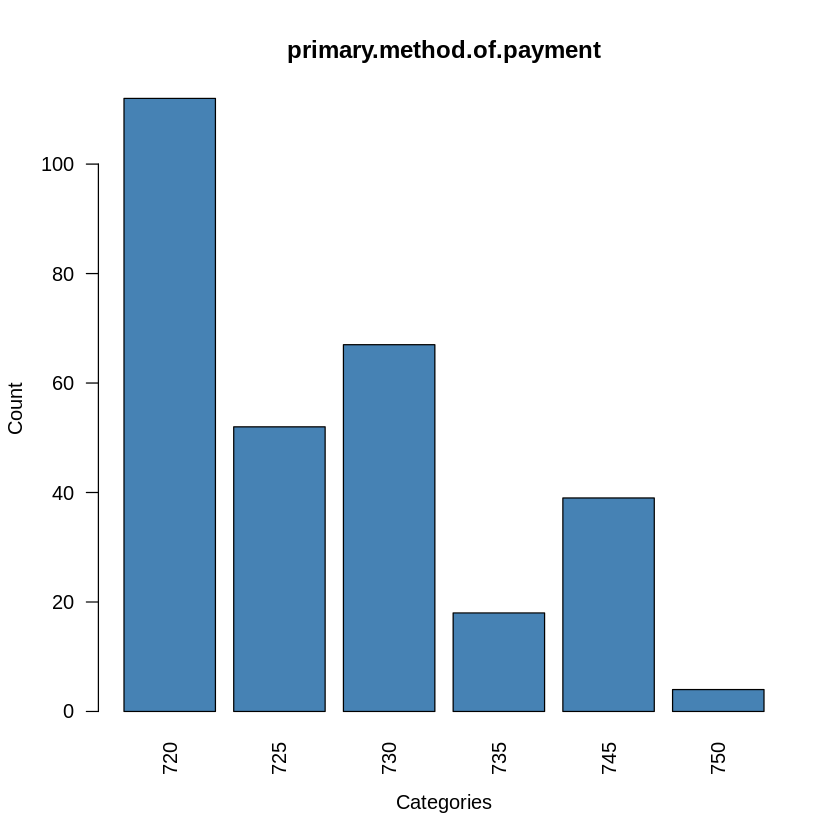

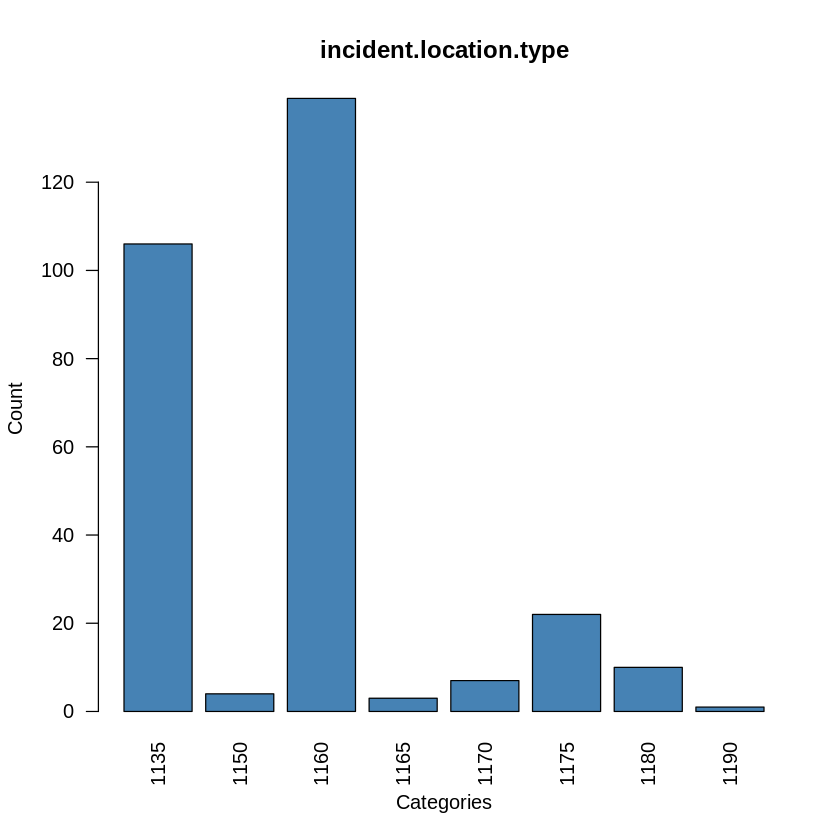

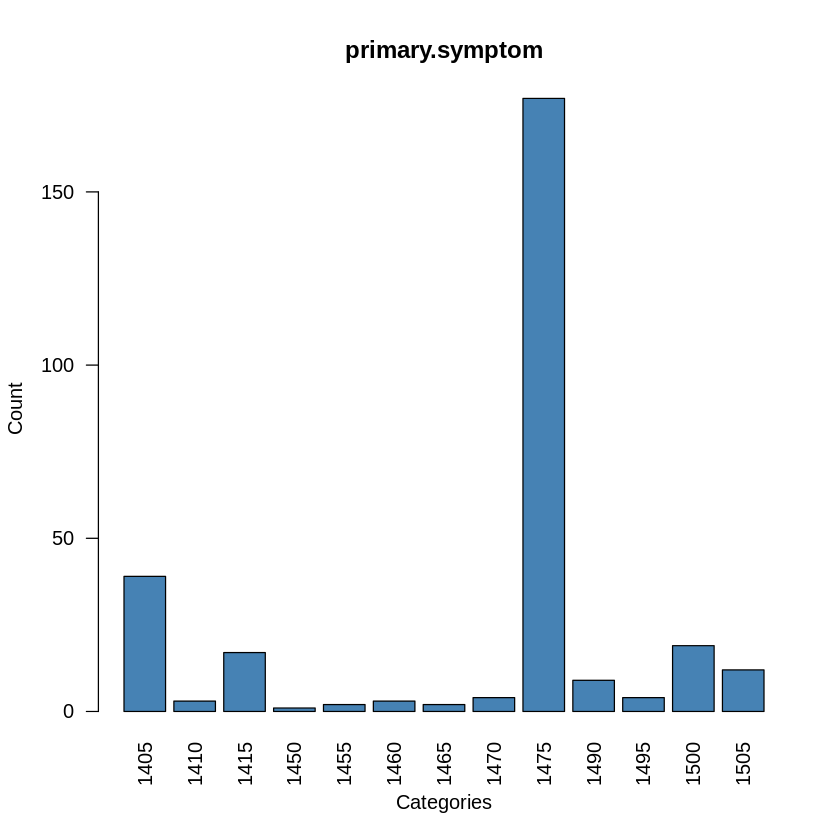

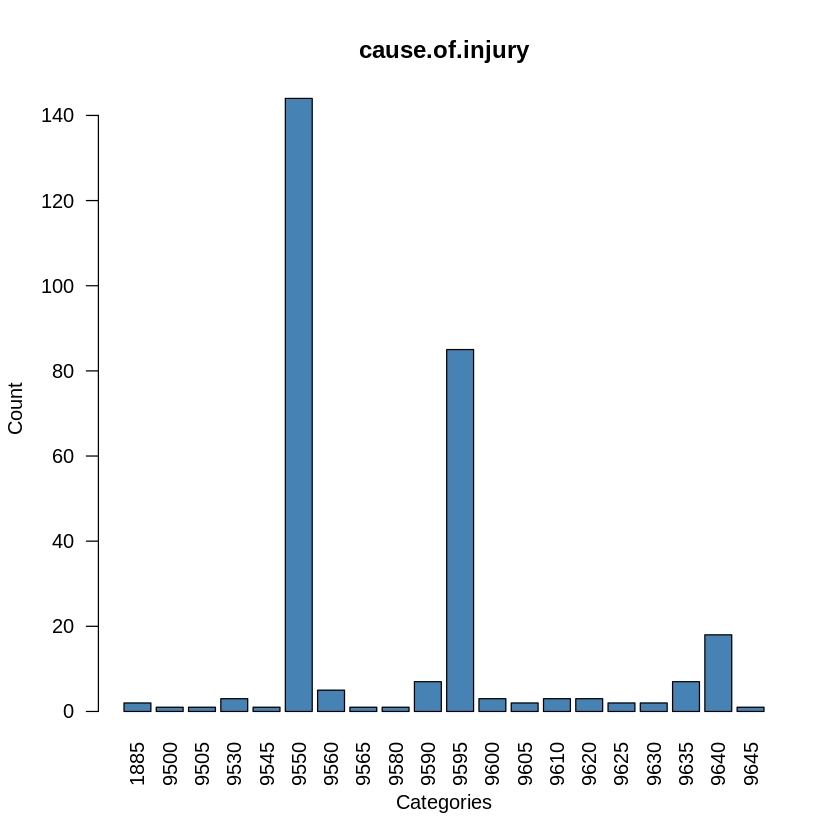

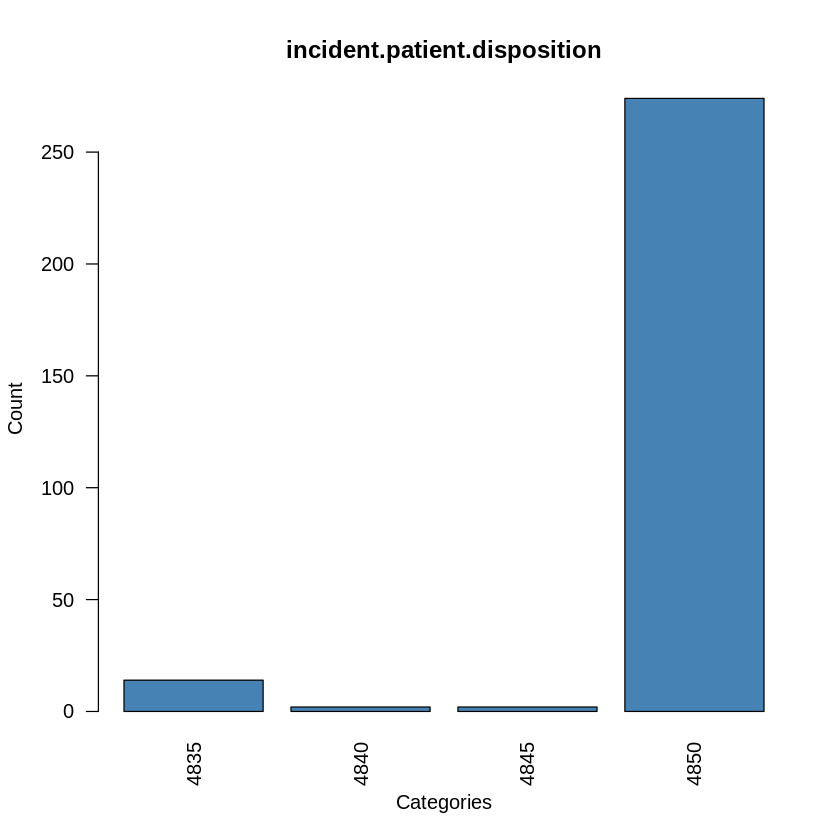

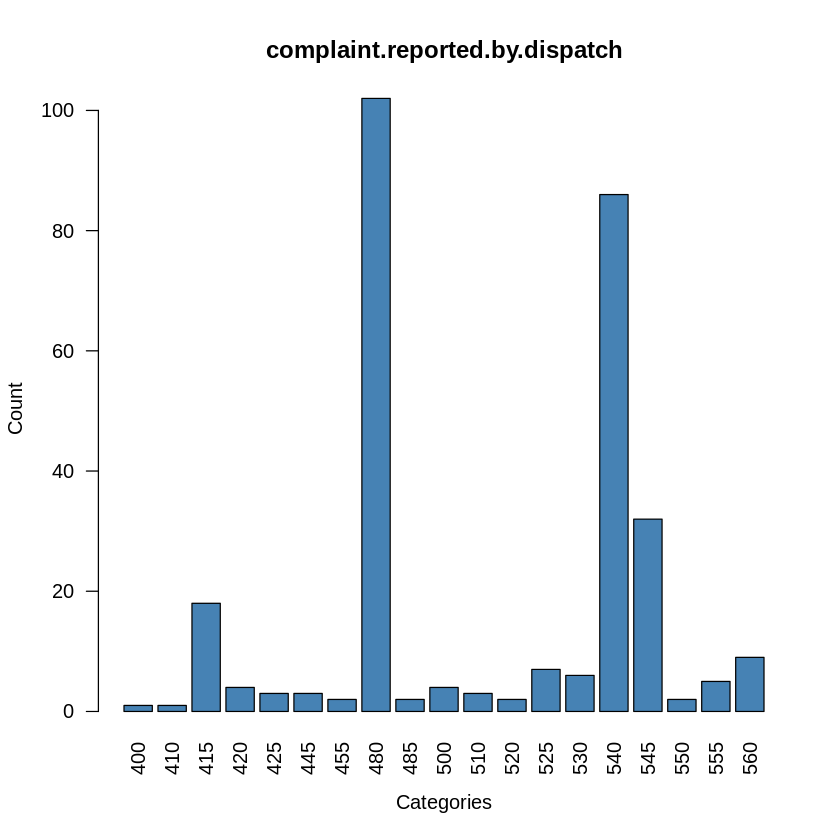

In [114]:
for (i in 2:8) {
  plot(event2[,i], main=colnames(event2)[i],
       ylab = "Count", xlab = "Categories", col="steelblue", las = 2)
  }

In [5]:
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 5))

ERROR: Error in inherits(X, c("PCA", "CA", "MCA", "FAMD", "MFA", "HMFA", "sPCA", : object 'res.mca' not found


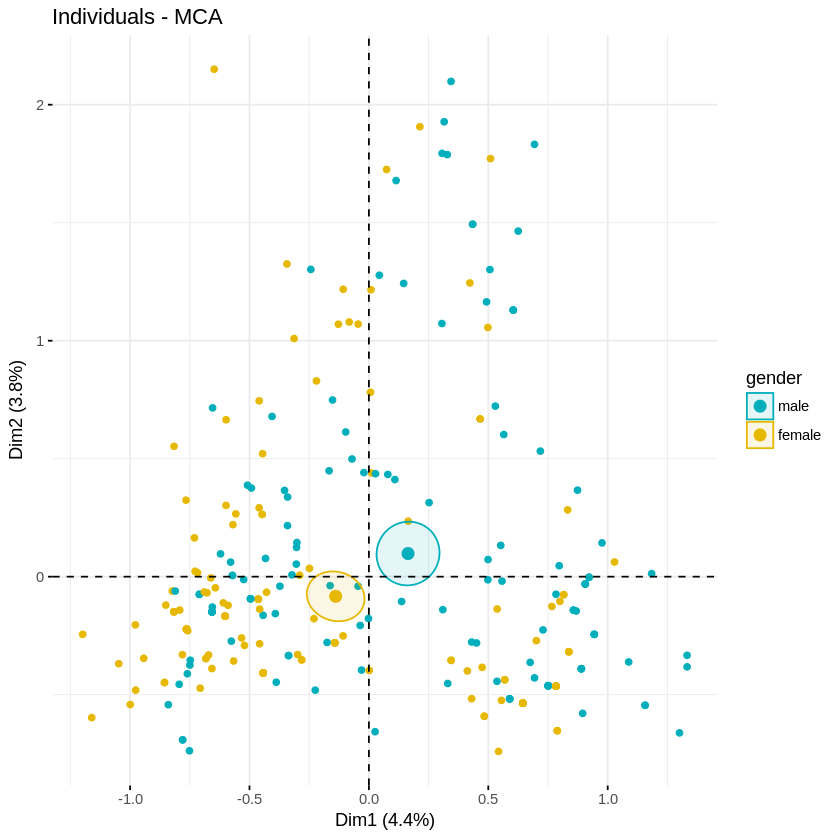

In [120]:
fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "gender", # color by groups 
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_minimal()) 

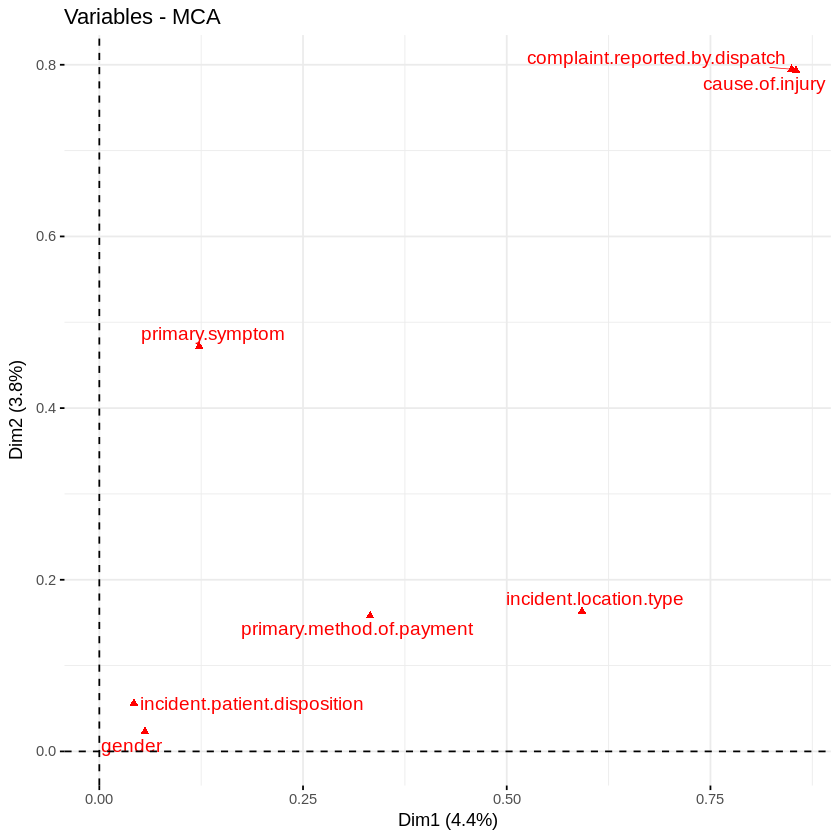

In [118]:
fviz_mca_var(res.mca, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

#It can be seen that, the variables gender and incident.patient.disposition are the most correlated 
#with dimension 1. Similarly, the variable primary.symptom is the most correlated with dimension 2.

In [119]:
fviz_mca_var(res.mca, choice = "quanti.sup",
             ggtheme = theme_minimal())


ERROR: Error in class(vars) <- c("factoextra", "mca", element_class): attempt to set an attribute on NULL


In [ ]:
age.in.years,day.of.year, 
event2 = event1[event1$incident.patient.disposition == "4835",]

In [ ]:
dim(event2)